## Projeto tem como objetivo criar um conjunto de possiveis modelos em ML  para o dataset do titanic.

<br> <b>O dataset é um conjunto de dados referente aos passageiros do Titanic.
<br> O objetivo é descobrir a probabilidade de um passageiro sobreviver.
<br> Nesse projeto será realizado as seguintes etapas:</b>

> **Etapas:** 
1. **Preparar o dataset:**
    * Carregar o dataset
    * Imprimir alguns dados do dataset
    * Obter informações sobre dados perdidos (null)
    * Extrair informações importantes do dataset
* **Limpando os dados:**
    * Incluindo valores fictícios nos campos null
    * Transformando dados
    * Removendo coluna contendo valores null
    * Remover linhas com informação null
* **Separar o dataset**
* **Criando modelos para testes**
    * Árvore de decisão
    * Florestas aleatórias
    * Perceptron
    * KNearest Neighboars
    * Regressão Logística
    * MultinomialNB
* **Realizando os testes e predições**
    * Calcular a média da predição de cada modelo
    * Comparar a predição dos modelos
    * Criar um arquivo de submissão


## Versão e documentação do SKLearn

Para maiores informações sobre o scikit-learn <a href='https://scikit-learn.org/0.19/_downloads/scikit-learn-docs.pdf'>User Guide </a>

In [1]:
##Version
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

## 1) Preparar o dataset

### 1.1 Carregar o dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

### 1.2 Imprimir alguns dados do dataset

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 1.3 Obter informações sobre dados perdidos (null)

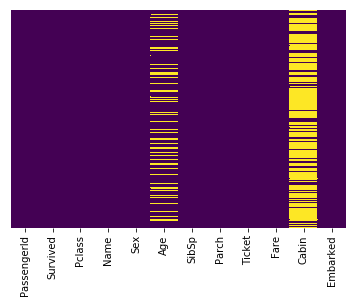

In [7]:
##Será exibido apenas os elementos que estiverem null
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Aproximadamente 20% dos dados de idade estão faltando. A proporção de idade que falta é provavelmente pequena o suficiente para que possamos fazer uma substituição razoável com alguma forma de imputação de dados. Olhando para a coluna Cabin, porém, parece que estamos perdendo muito desses dados para fazermos o mesmo. Provavelmente vamos descartar isso mais tarde ou mudá-lo para outro "Cabin Conhecido: 1 ou 0"

### 1.4 Extrair informações importantes do dataset
Para todo modelo é necessário verificar colunas importantes para conseguir extrair dados e assim criar relacionamento dos dados

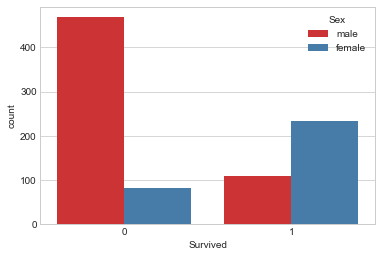

In [8]:
## Comparando os sobrevivementos e o sexo de cada um
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='Set1')

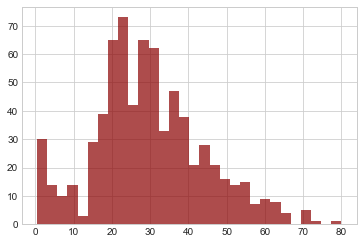

In [9]:
## Verificando a media da idade de cada pessoa
train_df['Age'].hist(bins=30,color='darkred',alpha=0.7)

## 2) Limpando os dados
Essa é uma parte bem especifica para cada Dataset, e extremamente importante.
<br>Para treinar o dataset, não pode haver nenhum valor NULL.
<br>E para solucionar esse problema será feito de 3 formas: 
 * Incluindo dados ficticios com alguma precisão.
 * Transformando dados.
 * Removendo a coluna inteira.
 * Removendo linhas que tenha valore null.
 
<br>E também não pode haver valores textuais, então eles deverão ser alterados por valores numericos, por exemplo: <i>Sexo: 0,1 ao invés de M,F  </i>
<br><b>OBS:</b> é importante limpar os dados do dataset de teste também

### 2.1 Incluindo valores fictícios nos campos null
Por exemplo, para aproveitarmos a idade, podemos criar uma media da idade de acordo com a classe de cada passageiro, e incluir esse valor nos que estão null

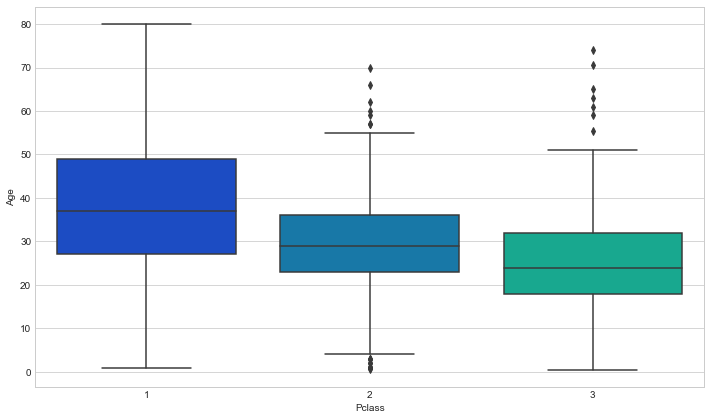

In [10]:
# Descobrir a media da idade por classe (Pclass)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [11]:
#Agora é so criar uma função para incluir a idade de acordo com a classe.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age,axis=1)

### 2.2 Transformando dados
Aproveitando os valores textuais do nome dos passageiros para conseguir gerar informação valida para o teste e treinamento do modelo.

In [12]:
## Obter uma lista com todos os titulos possíveis.
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [13]:
## Descobrir quais são os principais titulos
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [14]:
##Incluir uma coluna chamada titulo condizente com os 5 principais titulos do dataset.

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 2.3 Removendo coluna contendo valores null

In [15]:
## Remover a coluna Cabin devido a falta de informação que essa coluna nos fornece.
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

### 2.4 Remover linhas com informação null

In [16]:
##Remover qualquer linha que contenha informações null
train_df.dropna(inplace=True)

print(test_df.size)
## É importante não perder nenhum elemento do teste para conseguir realizar a submição no Kaggle
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
print(test_df.size)

4598
4598


DATASET - TREINO


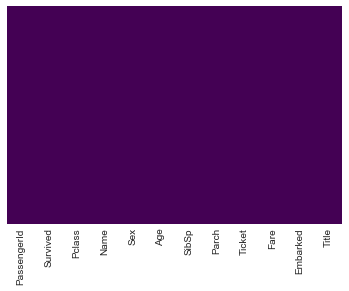

In [17]:
##Verificando se não há mais nenhum elemento null
print("DATASET - TREINO")
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

DATASET - TESTE


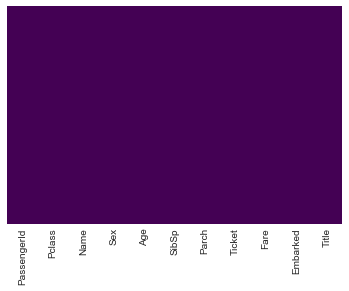

In [18]:
print("DATASET - TESTE")
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 2.4 Substituindo as colunas que possuem apenas dois tipos para 0 e 1

In [19]:
##Realizando com o dataset de treinamento
sex = pd.get_dummies(train_df['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

train_df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
train_df = pd.concat([train_df,sex,embark],axis=1)

train_df.columns.size

10

In [20]:
##Realizando com o dataset de teste
sex = pd.get_dummies(test_df['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(test_df['Embarked'],drop_first=True)

test_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_df = pd.concat([test_df,sex,embark],axis=1)

## OBS: A quantidade de colunas do dataset de teste e de treino precisam ter a mesma quantidade de colunas.
test_df.columns.size

10

## 3) Separar o dataset
Para separar o dataset é preciso criar uma dataset 'X' que contém apenas valor que queira ser descoberto, no caso **Survived** e outro dataset 'y' contendo todo o resto de informação, menos a coluna  **Survived**


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((889, 9), (889,), (418, 9))

## 4) Criando modelos para testes
Para criar o modelo é preciso realizar os seguintes passos:
* Instanciar o tipo de modelo
* Realizar o fit passando o x_train e o y_train
* Realizar o predict para o x_test

### 4.1 Árvore de decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_predictions = decision_tree.predict(X_test)

### 4.2 Florestas aleatórias

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest = RandomForestClassifier(n_estimators=600)
random_forest.fit(X_train,Y_train)
random_forest_predictions = random_forest.predict(X_test)

### 4.3 Perceptron

In [27]:
from sklearn.linear_model import Perceptron

In [28]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
perceptron_predictions = perceptron.predict(X_test)

D:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### 4.4 KNearest Neighboars

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []

# Isso fará com que ele execute o teste 40 vezes para descobrimos um numero ideal de vizinhos para esse modelo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(round(knn.score(X_train, Y_train) * 100, 2))
    

Text(0,0.5,'Error Rate')

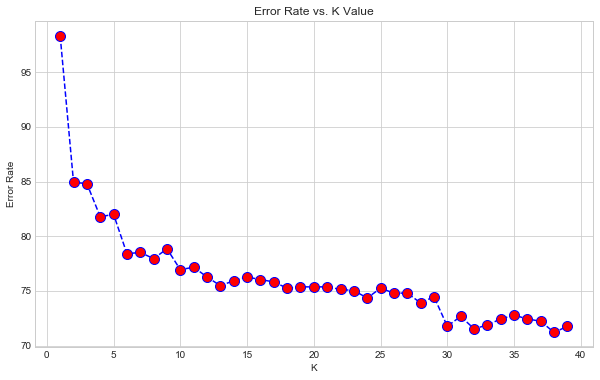

In [31]:
## Descobrir a quantidade ideal de vizinhos

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [32]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)

### 4.5 Regressão Logística

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
logmodel_predictions = logmodel.predict(X_test)

### 4.6 MultinomialNB

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
nb_predictions = nb.predict(X_test)

## 5) Realizando os testes e predições

Para que o modelo seja considerado com um bom resultado, a média do precision precisa está acima de 80%

### 5.1 Calcular a média da predição de cada modelo

In [37]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("DECISION TREE - > ", acc_decision_tree)

DECISION TREE - >  98.43


In [38]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("RANDOM FOREST - >", acc_random_forest)

RANDOM FOREST - > 98.43


In [39]:
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("Perceptron - >", acc_perceptron)

Perceptron - > 75.03


In [40]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("KNearest Neighboars - > ", acc_knn)

KNearest Neighboars - >  71.77


In [41]:
acc_logmodel = round(logmodel.score(X_train, Y_train) * 100, 2)
print("Logistic Regression - > ", acc_logmodel)

Logistic Regression - >  81.1


In [42]:
acc_nb = round(nb.score(X_train, Y_train) * 100, 2)
print("MultinomialNB - > ", acc_nb)

MultinomialNB - >  68.73


### 5.2 Comparar a predição dos modelos

In [43]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 'MultinomialNB', 
              'Decision Tree'],
    'Score': [acc_knn, acc_logmodel, 
              acc_random_forest, acc_perceptron,
              acc_nb, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.43
5,Decision Tree,98.43
1,Logistic Regression,81.10
3,Perceptron,75.03
0,KNN,71.77
4,MultinomialNB,68.73


### 5.3 Criar um arquivo de submissão
O resultado dessa submissão no Kaggle ficou com um score de 0.76555, isso provavelemnte se deve pelo fato de temos removido varias colunas 

In [44]:
Y_pred = random_forest.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('../submission.csv', index=False)

 DOC: para maiores informações sobre esse dataset e informações sobre ele : https://www.kaggle.com/startupsci/titanic-data-science-solutions